<a href="https://colab.research.google.com/github/avkornaev/Fast_AI_course/blob/main/IRI_defects_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Установка библиотек**

In [31]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

**Импорт библиотек**

In [32]:
from fastai.vision.all import *

**Загрузка данных**

In [34]:
path =  Path('/content/gdrive/MyDrive/work/Tribology/IRI_dataset/Training')

In [35]:
path.ls()

(#2) [Path('/root/.fastai/data/oxford-iiit-pet/annotations'),Path('/root/.fastai/data/oxford-iiit-pet/images')]

Скачивание файлов изображений.

In [36]:
files = get_image_files(path/'images')

In [37]:
len(files)

7390

Особенность: файлы с кошками начинаются с заглавных букв, файлы с собаками - с прописных.

In [38]:
files[0],files[2]

(Path('/root/.fastai/data/oxford-iiit-pet/images/Sphynx_141.jpg'),
 Path('/root/.fastai/data/oxford-iiit-pet/images/great_pyrenees_38.jpg'))

Разметка изображений по типу первой буквы в названии.

In [39]:
def label_func(f): return f[0].isupper()

In [40]:
label_func('Great_pyrenees_38.jpg')

True

**Создание датасета**

Используется DataLoader, который считывает разметку данных с названия файла



In [41]:
dls = ImageDataLoaders.from_name_func(path,files,
                                      label_func,item_tfms=Resize(224))

Просмотр примера изображений и их меток (кошка -True, собака - False).

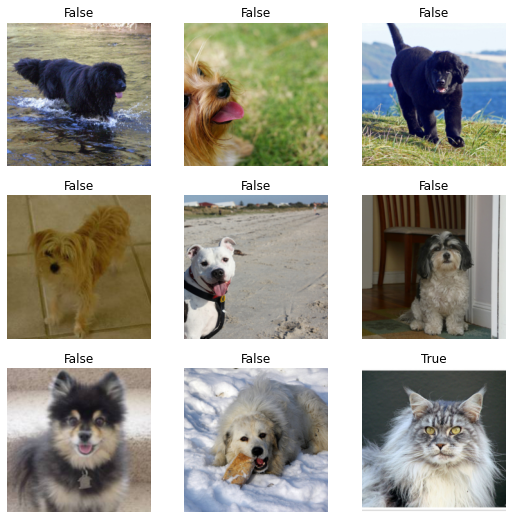

In [42]:
dls.show_batch()

**Обучение**

In [ ]:
learn = cnn_learner(dls,resnet34,metrics=error_rate)
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time


epoch,train_loss,valid_loss,error_rate,time
0,0.130471,0.021172,0.010149,35:18


epoch,train_loss,valid_loss,error_rate,time


**Результаты**

Предсказание для любого конкретного изображения

In [ ]:
learn.predict(files[101]),files[101]

Визуализация предсказаний.

In [ ]:
learn.show_results()